In [1]:
from __future__ import print_function, division
import os
from numpy.core.fromnumeric import transpose
from skimage import io,transform ,filters
import matplotlib.pyplot as plt
import numpy as np
import glob
import skimage
import torch
from torch.utils.data import Dataset,DataLoader
import random
from scipy import ndimage
from scipy.ndimage.interpolation import zoom
from torchvision import transforms
from dataloader import CrackSegDataset,RandomGenerator
from networks.vision_transformer import SwinUnet as ViT_seg
from config import get_config
import argparse
import cv2
from config import _C
from torch import nn



ckpt = torch.load("./pretrained_ckpt/epoch_149iter_160000.pth")
db_train = CrackSegDataset(partition = "test",
                           transform=transforms.Compose(
                               [RandomGenerator(output_size=[448,448])]))

testloader = DataLoader(db_train, batch_size= 4, shuffle=True, num_workers=8, pin_memory=True)
config = _C
config.MODEL
net = ViT_seg(config, img_size=(448,448), num_classes=1).cuda()
net.load_state_dict(ckpt)
net.eval()



    
   

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:1
---final upsample expand_first---


SwinUnet(
  (swin_unet): SwinTransformerSys(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): BasicLayer(
        dim=96, input_resolution=(112, 112), depth=2
        (blocks): ModuleList(
          (0): SwinTransformerBlock(
            dim=96, input_resolution=(112, 112), num_heads=3, window_size=7, shift_size=0, mlp_ratio=4.0
            (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              dim=96, window_size=(7, 7), num_heads=3
              (qkv): Linear(in_features=96, out_features=288, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=96, out_features=96, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
  

In [ ]:
ckpt = torch.load("./pretrained_ckpt/epoch_149iter_160000.pth")
ckpt.keys()

In [24]:
path = "./datasets/crack_segmentation_dataset"
base_dir = os.path.join(str(os.getcwd()),"datasets")
dataset_dir = os.path.join(base_dir,"crack_segmentation_dataset")
mask_dir =  os.path.join(os.path.join(dataset_dir,"test"),"masks")
img_dir =  os.path.join(os.path.join(dataset_dir,"test"),"images")
imgs = os.listdir(img_dir)
masks = os.listdir(mask_dir)

In [25]:
import random
idx = random.sample(range(len(imgs)),1)[0]
img = io.imread(os.path.join(img_dir,imgs[idx]))
mask = io.imread(os.path.join(mask_dir,masks[idx]))

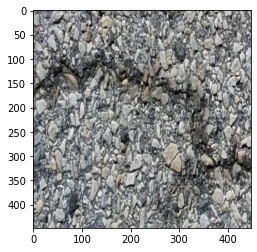

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)


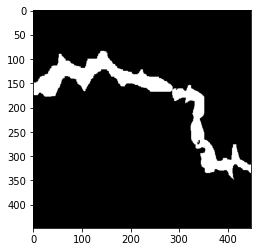

In [31]:
plt.imshow(mask)

In [32]:
act = nn.Sigmoid()
inp = torch.from_numpy(img.transpose(2,0,1)).cuda().unsqueeze(0)/255.0
out = (act(net(inp).squeeze(0).squeeze(0)).detach().cpu().numpy()*255).astype(int)
print(out)
out[out > 127] =  255
out[out < 127]  = 0


[[110 110 110 ... 110 110 111]
 [110 111 110 ... 110 110 110]
 [110 110 110 ... 109 110 110]
 ...
 [110 110 110 ... 110 110 111]
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]]


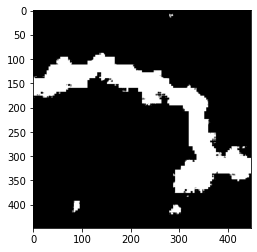

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(out)
plt.gray()
